In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

# Load data from CSV file
data = pd.read_csv("crudeoil8.2.csv")

# Assuming 'crude_oil_price' is the column name for crude oil prices
# and other columns are feature variables
X = data.drop(columns=['CO1 Comdty Delta']).values
y = data['CO1 Comdty Delta'].values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [4]:
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)  # Input layer to first hidden layer         # First hidden layer to second hidden layer
        self.fc2 = nn.Linear(256, 128)           # Second hidden layer to third hidden layer
        self.fc3 = nn.Linear(128, 64)           # Third hidden layer to fourth hidden layer
        self.fc4 = nn.Linear(64, 32)            # Fourth hidden layer to output layer
        self.fc5 = nn.Linear(32, 16)
        self.fc6 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU activation function for first hidden layer
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)              # Output layer, no activation function
        return x

In [5]:
input_size = X_train.shape[1]
model = NeuralNet(input_size)

In [6]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [7]:
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.unsqueeze(1))  # Unsqueezing y_train_tensor to match shape

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 2.0297
Epoch [200/1000], Loss: 1.4156
Epoch [300/1000], Loss: 1.2071
Epoch [400/1000], Loss: 1.0678
Epoch [500/1000], Loss: 1.1933
Epoch [600/1000], Loss: 0.9724
Epoch [700/1000], Loss: 0.9159
Epoch [800/1000], Loss: 0.8866
Epoch [900/1000], Loss: 0.7961
Epoch [1000/1000], Loss: 0.8167


In [8]:
with torch.no_grad():
    model.eval()
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor.unsqueeze(1))
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 8.4994


In [9]:
# Convert predictions back to a numpy array for further analysis
y_pred_numpy = y_pred.detach().numpy()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred_numpy)
mae = mean_absolute_error(y_test, y_pred_numpy)
r2 = r2_score(y_test, y_pred_numpy)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error (MSE): 8.4994
Mean Absolute Error (MAE): 1.7106
R-squared: -1.7609


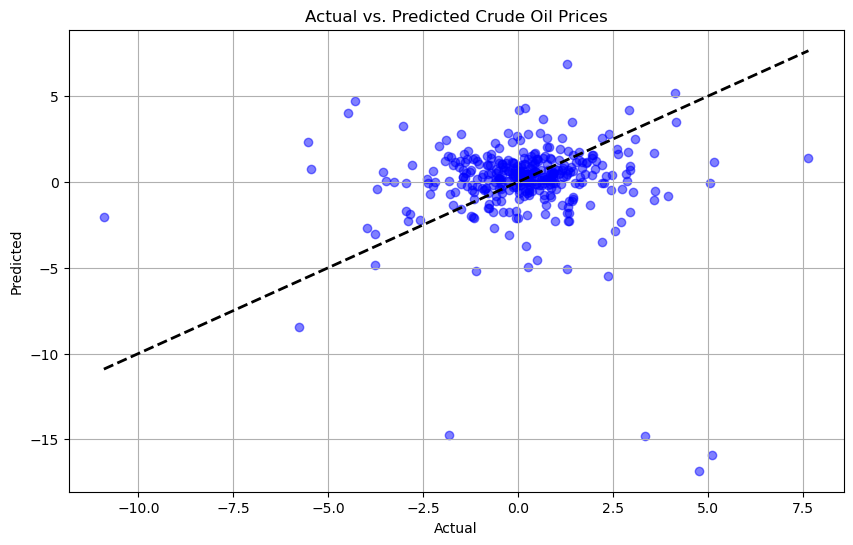

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_numpy, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Crude Oil Prices')
plt.grid(True)
plt.show()

In [12]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100 
    
mape = mean_absolute_percentage_error(y_test, y_pred_numpy)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.4f}%')

Mean Absolute Percentage Error (MAPE): inf%


C:\Users\parth003\AppData\Local\Temp\ipykernel_17832\3744496878.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [13]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_numpy)) 
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


Root Mean Squared Error (RMSE): 2.9154


In [14]:
mae = mean_absolute_error(y_test, y_pred_numpy) 
print(f'Mean Absolute Error (MAE): {mae:.4f}')


Mean Absolute Error (MAE): 1.7106


In [15]:
r2 = r2_score(y_test, y_pred_numpy) 
print(f'R-squared: {r2:.4f}')

R-squared: -1.7609


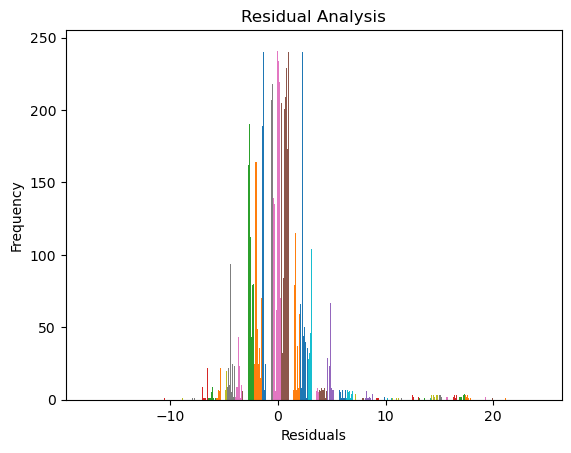

In [16]:
residuals = y_test - y_pred_numpy 
plt.hist(residuals, bins=20) 
plt.xlabel('Residuals') 
plt.ylabel('Frequency') 
plt.title('Residual Analysis') 
plt.show()